<a href="https://colab.research.google.com/github/lingfang23/Take-Home-Challenge/blob/main/Conversion_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
pandas.set_option('display.max_columns', 10)
pandas.set_option('display.width', 350)
  
#read from google drive
data=pandas.read_csv("https://drive.google.com/uc?export=download&id=1LU5be_H1TD2Pp1OmI202to3YyKo9AzFY")

In [ ]:
print(data.head())

  country  age  new_user source  total_pages_visited  converted
0      UK   25         1    Ads                    1          0
1      US   23         1    Seo                    5          0
2      US   28         1    Seo                    4          0
3   China   39         1    Seo                    5          0
4      US   30         1    Seo                    6          0


## EDA


In [ ]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [ ]:
print(data.groupby(["country"]).size())

country
China       76602
Germany     13056
UK          48450
US         178092
dtype: int64


In [ ]:
data.groupby(["source"]).size()

source
Ads        88740
Direct     72420
Seo       155040
dtype: int64

In [ ]:
print(sorted(data["age"].unique(), reverse = True))

[123, 111, 79, 77, 73, 72, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17]


In [ ]:
data = data[data["age"]<100]

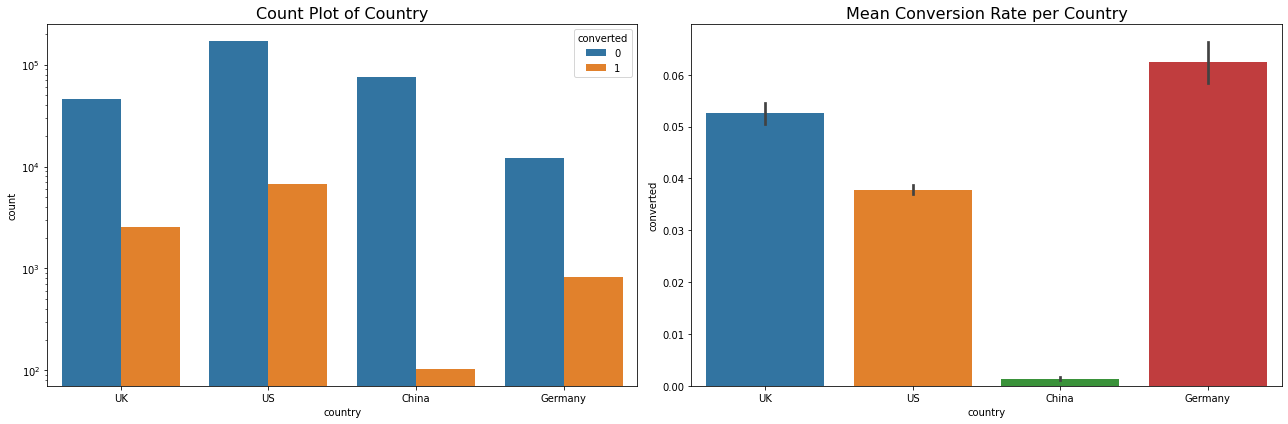

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
rcParams.update({'figure.autolayout': True})

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='country', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Country', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='country', y='converted', data=data, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per Country', fontsize=16)
plt.tight_layout()
plt.show()

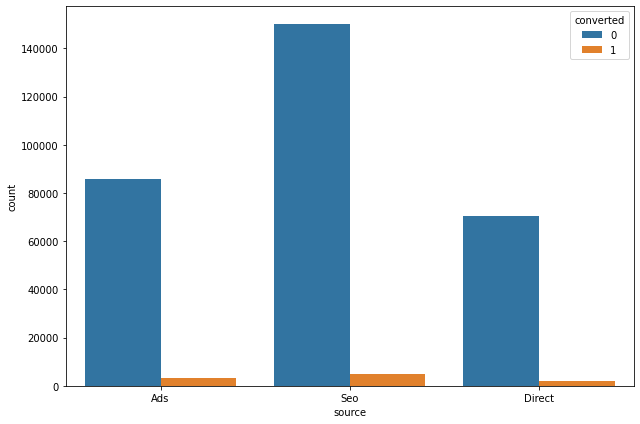

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
sns.countplot(x='source', hue='converted', data=data, ax=ax)
plt.show()

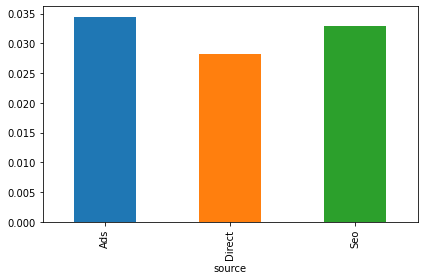

In [ ]:
data.groupby(["source"])["converted"].mean().plot.bar(color = mcolors.TABLEAU_COLORS)
plt.show()

In [ ]:
country_age = data.groupby("country")["age"].mean()
country_age

country
China      30.672972
Germany    30.442895
UK         30.449875
US         30.566482
Name: age, dtype: float64

In [ ]:
data_c = data[data["country"]=="China"]
china_source = data.groupby(['country', 'source']).agg({'converted': 'mean'})
print(china_source)
print("\n")
china_new = data.groupby(["country", "source"]).agg({"new_user": "mean"})
print(china_new)

                converted
country source           
China   Ads      0.001484
        Direct   0.001374
        Seo      0.001224
Germany Ads      0.066755
        Direct   0.053422
        Seo      0.063909
UK      Ads      0.055560
        Direct   0.046267
        Seo      0.053905
US      Ads      0.040580
        Direct   0.032909
        Seo      0.038508


                new_user
country source          
China   Ads     0.696628
        Direct  0.698677
        Seo     0.699532
Germany Ads     0.674468
        Direct  0.685056
        Seo     0.675478
UK      Ads     0.681882
        Direct  0.685563
        Seo     0.676022
US      Ads     0.682872
        Direct  0.682291
        Seo     0.681333


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


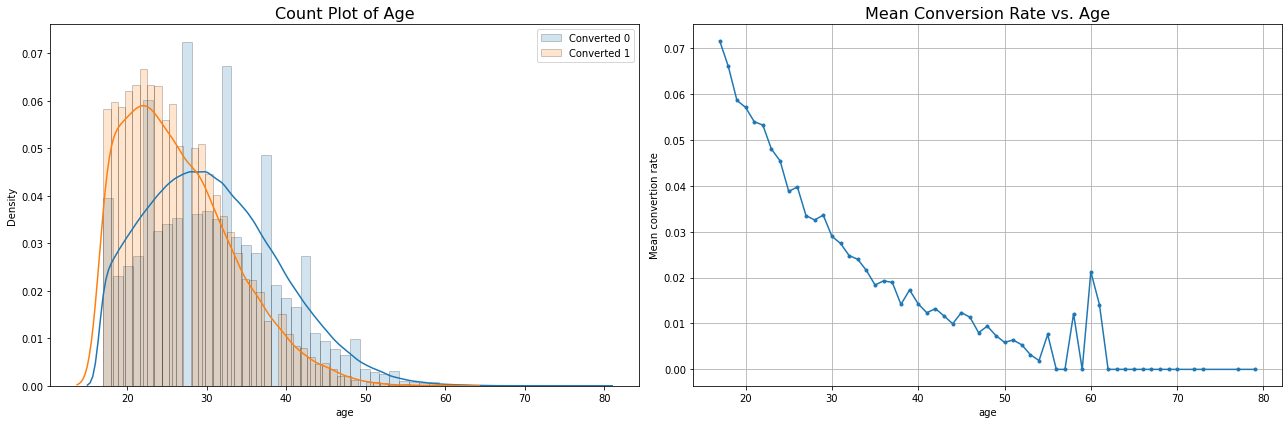

In [ ]:
grouped = data[['age', 'converted']].groupby('age').mean().reset_index()
fig, ax = plt.subplots(1,2, figsize = (18,6))
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

sns.distplot(data[data['converted'] == 0]['age'], label='Converted 0', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['converted'] == 1]['age'], label='Converted 1', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend() 
ax[1].plot(grouped['age'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Age', fontsize=16)
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True) 
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


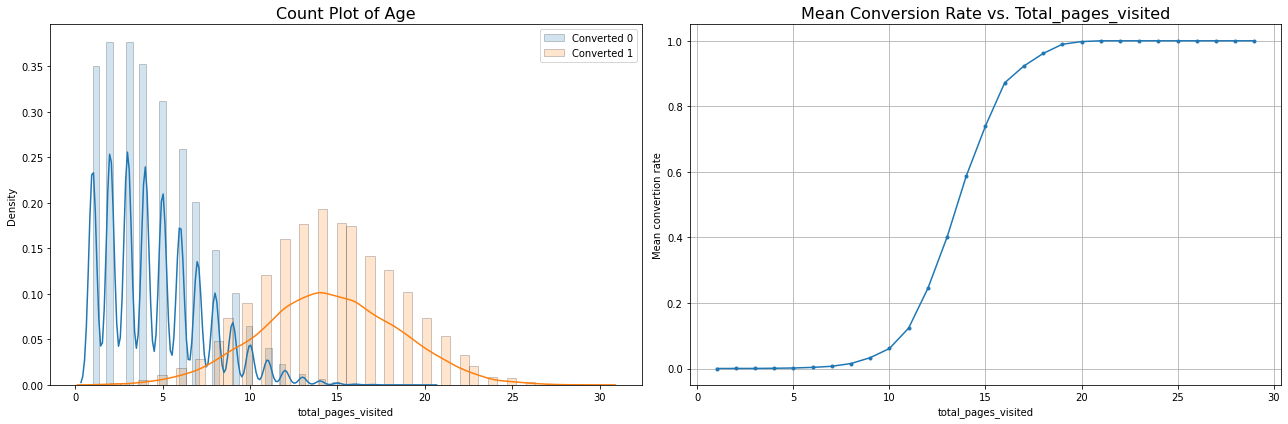

In [ ]:
grouped = data[['total_pages_visited', 'converted']].groupby("total_pages_visited").mean().reset_index() 

fig, ax = plt.subplots(1,2, figsize = (18,6))
sns.distplot(data[data["converted"] == 0]["total_pages_visited"], 
             label='Converted 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['converted'] == 1]['total_pages_visited'], 
             label='Converted 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()
ax[1].plot(grouped['total_pages_visited'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Total_pages_visited', fontsize=16)
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()

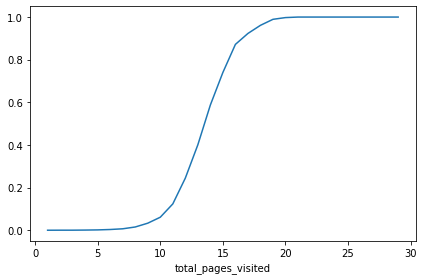

In [ ]:
data.groupby(['total_pages_visited'])['converted'].mean().plot()
plt.show()

## Model